<font color='red' size="+3"><b>Notes Qiskit UF</b></font>

# Quantum States and Qubits

## Introduction

## The Atoms of Computation

Understanding first classical computation and bits, using the same tools we will use later for quantum.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

First quantum circuit

3 jobs:

* enconde the input
* actual computation
* extract output

In [3]:
# define QC
qc_output = QuantumCircuit(8) # takes n of bits as argument

In [4]:
# add measurement
qc_output.measure_all() # extraction of outputs

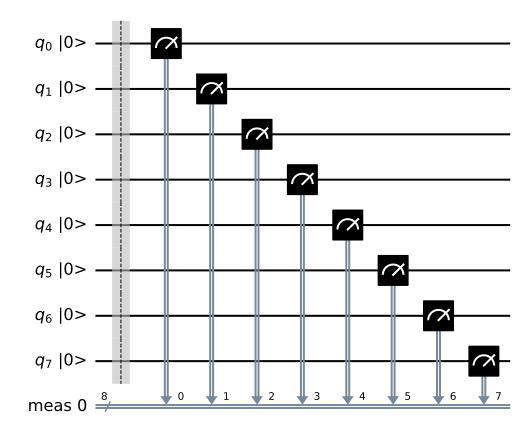

In [5]:
qc_output.draw(initial_state=True)

Notice the qubits are **always** initialized at $|0\rangle$.

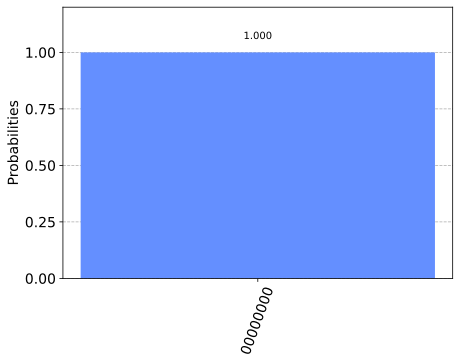

In [6]:
# simulating the circuit multiple times
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
count = result.get_counts()
plot_histogram(count)

We run many times because quantum computers may have some randomness when measuring.

Notice this is a **simulation**, which can be done only to a small number of qubits $\approx 30$. To run in a real device, just need to replace `Aer.get_backend('aer_simulator')` with the backend of the device.

### Example: creating an Adder circuit (item 4 on textbook)

Remember, we need to:
    
* enconde the input
* actual computation
* extract output

#### Enconding the input

NOT gate first: flips the qubit -> x

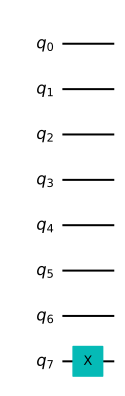

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7) #(the very last qubit)
qc_encode.draw()

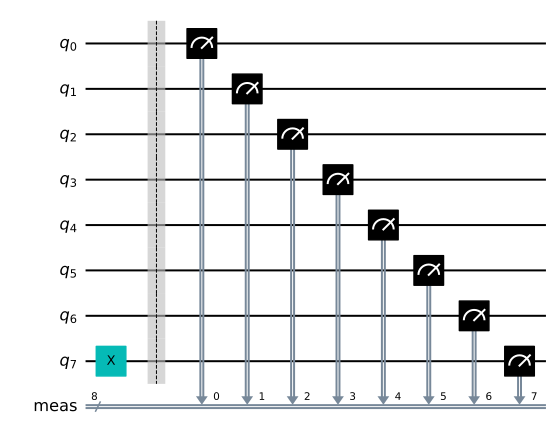

In [8]:
qc_encode.measure_all()
qc_encode.draw()

And similarly to before, we can simulate it:

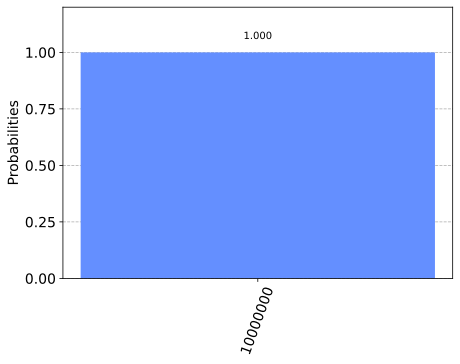

In [9]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

**Notice it reads from right to left**, to be similar to the representation of numbers in the decimal system

$$
1 \times 2^7 + 0 \times 2^6 + 0 \times 2^5 + 0 \times 2^4 + 0 \times 2^3 + 0 \times 2^2+ 0 \times 2^1 + 0 \times 2^0
=10000000
$$



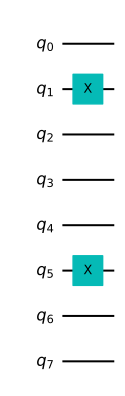

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

Remember the usual addition, carry one algorithm.

\begin{eqnarray}
&  10 \\
+&  01 \\
=&  11
\end{eqnarray}


The sums in decimal then becomes,

\begin{eqnarray}
0+0 &= 00 \\
0+1 &= 01 \\
1+0 &= 01 \\
1+1 &= 10 
\end{eqnarray}

which is called a **half adder**.

<img src="figures/half-adder.svg">

The two qubits to add are encoded in $0$ and $1$. In the above circuit, we are looking for the solution of $1+1$. The results will be stored on the qubits 2 and 3 and will store in classical bits 0 and 1, respectively.

*Dashed lines are made with the* `barrier` *command*.

Remember

\begin{eqnarray}
0+0 &= 00 \\
0+1 &= 01 \\
1+0 &= 01 \\
1+1 &= 10 
\end{eqnarray}

Notice this seems like **XOR gate**:

\begin{eqnarray}
0+0 &= 0 \\
0+1 &= 1 \\
1+0 &= 1 \\
1+1 &= 0 
\end{eqnarray}

which in quantum computers is done by the **CNOT gate**, `cx`.

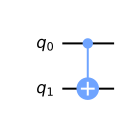

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1) ## first is the control, second is the target
qc_cnot.draw()

It compares both inputs to see if they are different, and overwrites the target bit with the answer. Or, said in another manner, it flips the target if the control is $1$.

<img src="figures/cnot_xor.svg">

Trying it:

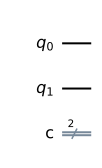

In [12]:
qc = QuantumCircuit(2,2) # Two quantum, two classical regimes
qc.draw()

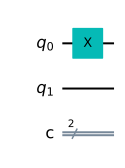

In [13]:
qc.x(0)
qc.draw()

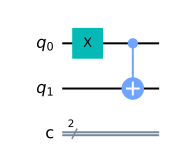

In [14]:
qc.cx(0,1)
qc.draw()

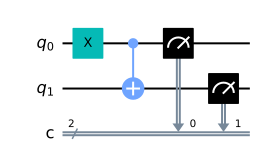

In [15]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

The result should be $11$

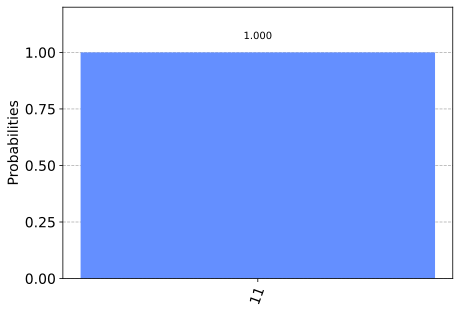

In [16]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Or, all in one single cell:

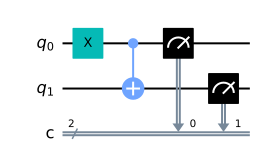

In [17]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

For our half adder, we don’t want to overwrite one of our inputs. 

Instead, *we want to write the result on a different pair of qubits*. For this, we can use two CNOTs.

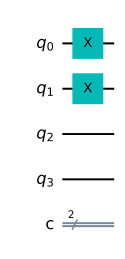

In [18]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, l
qc_ha.draw()

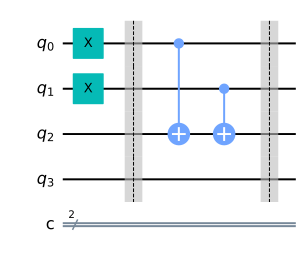

In [19]:
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
qc_ha.draw()

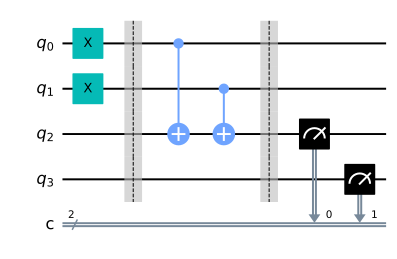

In [20]:
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

All in one cell:

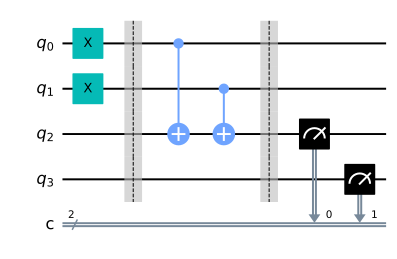

In [21]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

So, $q_2$ has the result of the first bit. 

For the second qubit, recorded in $q3$, it will only be $1$ when $1+1 = 10$. Therefore, we can check when both inputs are $1$. If both are, we need a **NOT** gate on $q3$, controlled on both $q1$ and $q2$: **Toffoli gate** (basically an AND gate); `ccx`. 

Repeating the circuit above:

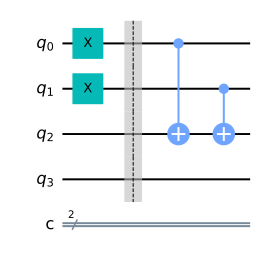

In [22]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.draw()

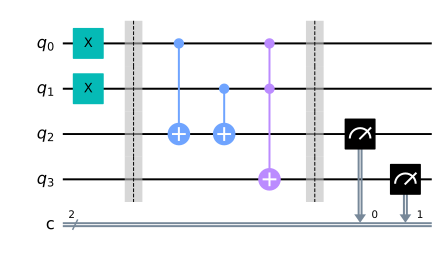

In [23]:
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

Now let's calculate the outcomes of this circuit. Notice that so far we have only created the circuit. Now let's calculate it:


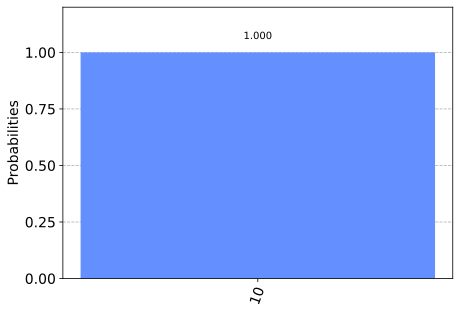

In [24]:
#### Notice that assemble -> qobj is not needed anymore, 
#### can run the circuit directly
#qobj = assemble(qc_ha)
#counts = sim.run(qobj).result().get_counts()

counts = sim.run(qc_ha).result().get_counts()
plot_histogram(counts)

0 0


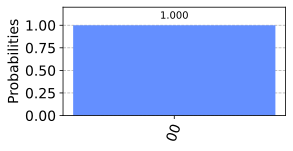

0 1


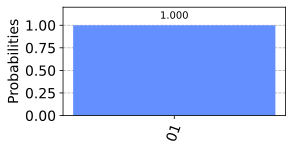

1 0


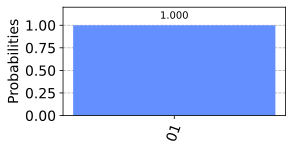

1 1


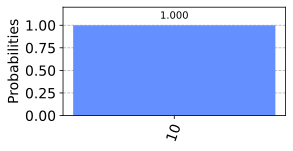

In [25]:
## trying all possibilities:
for q0, q1 in [(q0,q1) for q0 in [0,1] for q1 in [0,1]]:
    print(q0,q1)
    qc_ha = QuantumCircuit(4,2)
    # encode inputs in qubits 0 and 1
    if q0 == 1:
        qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
    if q1 == 1:
        qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
    qc_ha.barrier()
    # use cnots to write the XOR of the inputs on qubit 2
    qc_ha.cx(0,2)
    qc_ha.cx(1,2)
    # use ccx to write the AND of the inputs on qubit 3
    qc_ha.ccx(0,1,3)
    qc_ha.barrier()
    # extract outputs
    qc_ha.measure(2,0) # extract XOR value
    qc_ha.measure(3,1) # extract AND value

    qc_ha.draw()
    
    counts = sim.run(qc_ha).result().get_counts()
    display(plot_histogram(counts, figsize=(4, 2)))

The half-adder contains everything needed for addition!

NOT+CNOT+Toffoli: can add any set of numbers of any size.

In fact, we could even do without the CNOT and NOT (only used to go from $0 \rightarrow 1$). **The Toffoli gate is the atom of quantum computation.**

## Representing Qubit States 

Example of statevector


$$ | q_0 \rangle 
= 
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{i}{\sqrt{2}} 
\end{bmatrix}
$$

and since $|0\rangle$ and $|1\rangle$ form and orthonormal basis, we can write the statevector on this basis as a __superposition__ of $|0\rangle$ and $|1\rangle$:

$$
| q_0 \rangle 
= \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle
$$

### Exploring Qubits with Qiskit

In [26]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [27]:
qc = QuantumCircuit(1)# Create a quantum circuit with one qubit

Qubits always start on $|0\rangle$, but we can use the `initialize()` method to transform it.

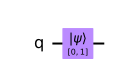

In [28]:
qc = QuantumCircuit(1)# Create a quantum circuit with one qubit
initial_state = [0,1] ## notice we give it in the matrix form, as a list
qc.initialize(initial_state, 0) ## what we want the initial state to be, which qubit
qc.draw()

We can them use one of Qiksit simulators to view the resulting state of the qubit:

In [29]:
sim = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(1)# Create a quantum circuit with one qubit
initial_state = [0,1] ## notice we give it in the matrix form, as a list
qc.initialize(initial_state, 0) ## what we want the initial state to be, which qubit
qc.save_statevector() ## tell sim to save statevector, but only possible with sim, obvioulsy
result = sim.run(qc).result()  ##.result gets the result of measurement

out_state = result.get_statevector()
print(out_state) ## which should be the state we gave initially



[0.+0.j 1.+0.j]


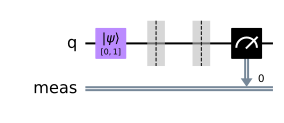

In [30]:
qc.measure_all()
qc.draw()

To see which state we measured, run simulation and `get_counts()`

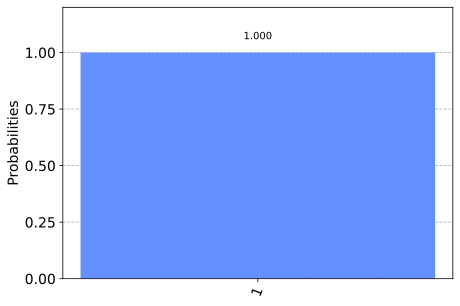

In [31]:
counts = result.get_counts()
plot_histogram(counts)

What if instead we tried the same thing with $|q_o\rangle$?

In [32]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.save_statevector()
state = sim.run(qc).result().get_statevector() ## which is the final statevector?
print(state)

[0.70710678+0.j         0.        +0.70710678j]


But what if we make a measurement?

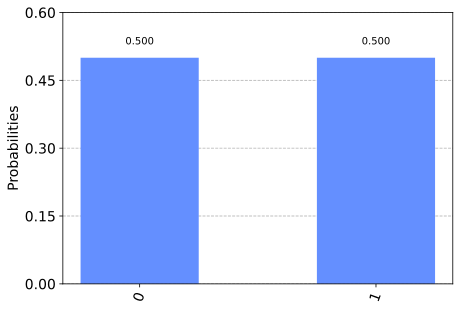

In [33]:
results = sim.run(qc).result().get_counts()
plot_histogram(results)

### The Rules of Measurement

Probability of measuring state $|\psi\rangle$ into state $|x\rangle$

$$
p(|x\rangle) = |\langle x |\psi \rangle|^2 
$$

where the inner product of

$$
\langle a| = 
\begin{bmatrix}
a_1^* & a_2^* & \cdots & a_n^* 
\end{bmatrix}
,
\ \ \ 
|b\rangle  = 
\begin{bmatrix}
b_1 \\ b_2 \\ \cdots \\ b_n 
\end{bmatrix}
$$

is given by

$$
\langle a| b\rangle = 
a_1^* b_1 + a_2^* b_2 + \cdots + a_n^* b_n 
$$

**In Qiskit, due to normalization, if one tries to initialize a vector that is not orthonormal, it will give us an error**


In [34]:

vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

Quick exercises:
1. Create a state vector that will give a $1/3$ probability of measuring $|0\rangle$ 
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring $|1\rangle$ for these states is $2/3$.

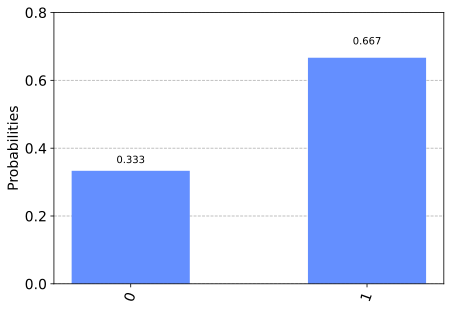

In [35]:
qc = QuantumCircuit(1)
initial_vector_1 = [1/sqrt(3), sqrt(2)/sqrt(3)]
qc.initialize(initial_vector_1, 0)
qc.save_statevector() ## We need to save statevector after initializing it, apparently
results = sim.run(qc).result().get_counts()
plot_histogram(results)

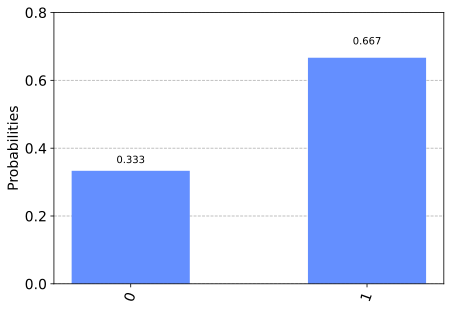

In [36]:
qc = QuantumCircuit(1)
initial_vector_2 = [1j/sqrt(3), -sqrt(2)/sqrt(3)]
qc.initialize(initial_vector_2, 0)
#qc.measure_all()
qc.save_statevector() ## We need to save statevector after initializing it, apparently
results = sim.run(qc).result().get_counts()
plot_histogram(results)

#2 And obviously, notice we can also measure in a different basis

#3 _Global phases_, typically not physically relevant:

 $\gamma$ such that $|\gamma|=1$

which are different from _relative phases_.

#4  Once measured, we know for certain which state the qubit is

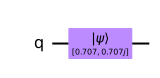

In [37]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.draw()

But after the measurement

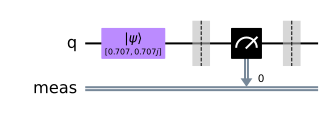

In [38]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

In [39]:
state = sim.run(qc).result().get_statevector()
print(state)

[1.+0.j 0.+0.j]


We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (0 or 1) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

$0110111110$

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: By default, the aer_simulator mimics the execution of a real quantum computer, but will also allow you to peek at quantum states before measurement if we include certain instructions in our circuit. For example, here we have included the instruction `.save_statevector()`, which means we can use `.get_statevector()` on the result of the simulation.

### The Bloch Sphere

The Qubit is described by

$$|q\rangle = \alpha|0\rangle + \beta|1\rangle, \ \ \alpha, \beta \  \mathrm{in} \ \mathbb{C} $$

but since we cannot observe global phases, we can remove one of the degrees of freedom and rewrite this as 

$$|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle, \ \ \alpha, \beta, \phi \  \mathrm{in} \ \mathbb{R} $$

and given the normalization $|\alpha|^2 + |\beta|^2 = 1$, we can use the trigonometric identity $\sin^2 x + \cos^2 x = 1$ to describe $\alpha, \beta$ in $\mathbb{R}$ in terms of a single angle $\theta$,

$$ \alpha = \cos\frac{\theta}{2}, \ \ \beta = \sin\frac{\theta}{2},$$

and describe the qubit using two angles $\phi$ and $\theta$,

$$|q\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle, \ \ \theta, \phi \  \mathrm{in} \ \mathbb{R}$$

This means we can represent these states in a Bloch sphere:

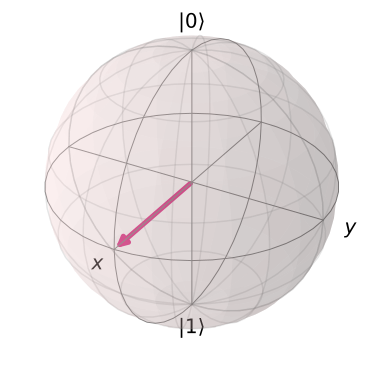

In [40]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2, 0, 1] ## theta, phi, radius
plot_bloch_vector_spherical(coords)

**Do not confuse the _Bloch vector_ with the _statevector_. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.**

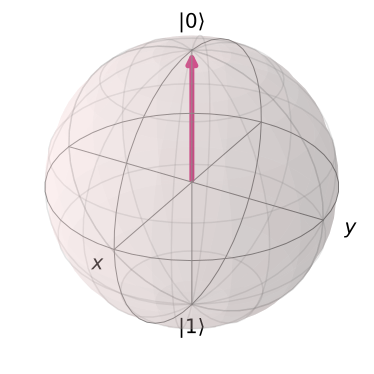

In [41]:
# 1: state 0 -> theta = 0, phi = 0

coords = [0, 0, 1]
plot_bloch_vector_spherical(coords)


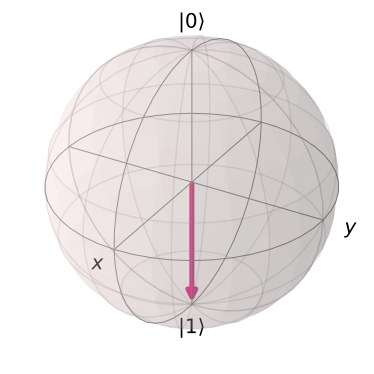

In [42]:
# 2: state 1 -> theta = pi, phi = 0
coords = [pi, 0, 1]
plot_bloch_vector_spherical(coords)

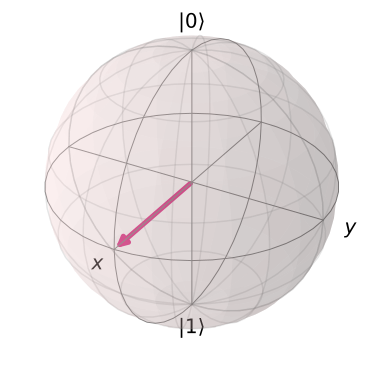

In [43]:
# 3: state (1/sqrt(2))(0+1) -> theta = pi/2, phi = 0
coords = [pi/2, 0, 1]
plot_bloch_vector_spherical(coords)

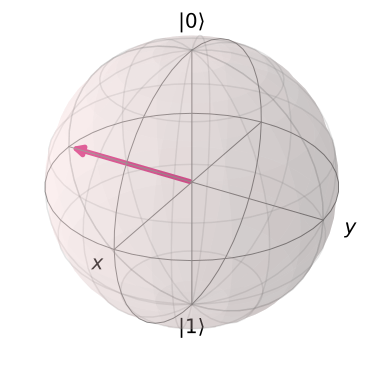

In [44]:
# 4: tate (1/sqrt(2))(0-i*1) -> theta = pi/2, phi = 3pi/2
coords = [pi/2, 3*pi/2, 1]
plot_bloch_vector_spherical(coords)

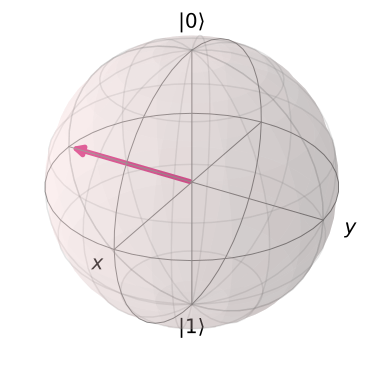

In [45]:
# 5: tate (1/sqrt(2))(0-i*1) -> theta = pi/2, phi = 3pi/2
coords = [pi/2, 3*pi/2, 1]
plot_bloch_vector_spherical(coords)

In [46]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

## Single Qubit Gates

In this section we will cover gates, the operations that change a qubit between these states.

In [47]:
from qiskit import QuantumCircuit, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')


### The Pauli Gates

#### The X-Gate

Pauli-X matrix

$$
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
=
|0\rangle \langle 1| + |1\rangle \langle 0|
$$

To see the effect of the gate, let's apply to $|0\rangle$ & $|1\rangle$.

$$
X|0\rangle = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
\begin{bmatrix}
1  \\
0
\end{bmatrix}
=
\begin{bmatrix}
0  \\
1
\end{bmatrix}
=
|1\rangle
$$

$\pi$ rotation around the X-axis

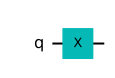

In [48]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

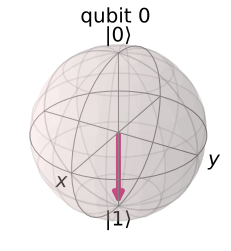

In [49]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

#### The Y & Z-Gates

$$
Y = 
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
=
-i|0\rangle \langle 1| + i|1\rangle \langle 0|
$$

$$
Z = 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
=
|0\rangle \langle 0| - |1\rangle \langle 1|
$$

$\pi$ rotation around y- and z-axis, respectively. 

In [50]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

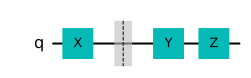

In [51]:
qc.y(0)
qc.z(0) 
qc.draw()

### Digression: the X, Y & Z Bases

$|0\rangle$ and $|1\rangle$ are the two eigenstatesof the Z-gate. In fact, the _computational basis_ ($|0\rangle$ and $|1\rangle$) is often called _Z-basis_. Another popular basis is the _X-basis_, the eigenstates of the X-gate:

$$
|+\rangle 
= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) 
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\
1
\end{bmatrix}
$$

$$
|-\rangle 
= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) 
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\
-1
\end{bmatrix}
$$

The less common are the eigenstates of the Y-gate, $|\circlearrowleft \rangle$ and  $| \circlearrowright \rangle$

__Quick exercises__

#1 Verify that $|+\rangle$ and $|-\rangle$  are in fact eigenstates of the X-gate.

#2 What eigenvalues do they have?

\begin{eqnarray}
X | + \rangle & = | + \rangle \\
X | - \rangle & = - | - \rangle
\end{eqnarray}


#3 Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

__Eigenvalues__:
$$
\begin{bmatrix}
-\lambda & -i \\
i & -\lambda
\end{bmatrix}
\rightarrow \lambda^2 = 1 \rightarrow \lambda = \pm 1
$$ 

__Eigenvectors__:
$$
\lambda = +1, \alpha=1 \rightarrow 
\begin{bmatrix}
-i\beta \\
i
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\beta
\end{bmatrix}
\rightarrow \beta = i 
\rightarrow |\lambda\rangle_+ = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
i
\end{bmatrix}
= \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)
$$ 

$$
\lambda = -1, \alpha=1 \rightarrow 
\begin{bmatrix}
-i\beta \\
i
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
-\beta
\end{bmatrix}
\rightarrow \beta = -i 
\rightarrow 
|\lambda\rangle_- = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
-i
\end{bmatrix} 
= \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)
$$ 


In [52]:
import numpy as np
from numpy.linalg import eig
a = np.array([[0, 0-1j], 
              [0+1j, 0]])
print(a)
w,v=eig(a)

print('E-value:', w, '\n')
print('E-vector', v)

[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
E-value: [ 1.+0.j -1.+0.j] 

E-vector [[-0.        -0.70710678j  0.70710678+0.j        ]
 [ 0.70710678+0.j          0.        -0.70710678j]]


__Using only Paulis we cannot move the qubit away from $|0\rangle$, $|1\rangle$ and we cannot achieve superpositions.__

### The Hadamard Gate

H-Gate


$$
H= \frac{1}{\sqrt(2)}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

Which allows the transformations 

$$
H| 0 \rangle = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
1 \\
1
\end{bmatrix} 
= |+\rangle
$$

$$
H| 1 \rangle = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
1 \\
-1
\end{bmatrix} 
= |-\rangle
$$

Which can be thought as a rotation of $\pi/2$ around the Bloch vector $[1, 0,1]$ (or around the y-axis), transforming the state of the qubit between the X and Z bases.

In [53]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

__Quick exercises:__

* #1 Write the H-gate as the outer products of vectors $|0\rangle, |1\rangle, |+\rangle, |-\rangle$  

We have that:


\begin{eqnarray}
|0\rangle \langle 0| &= 
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}\\
|0\rangle \langle 1| &=
\begin{bmatrix}
0 & 1 \\
0 & 0
\end{bmatrix}\\
|1\rangle \langle 0| &= 
\begin{bmatrix}
0 & 0 \\
1 & 0
\end{bmatrix}\\
|1\rangle \langle 1| &= 
\begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix}
\end{eqnarray}

and 

\begin{eqnarray}
|+\rangle \langle +| &= \frac{1}{2}
\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}\\
|+\rangle \langle -| &=\frac{1}{2}
\begin{bmatrix}
1 & -1 \\
1 & -1
\end{bmatrix}\\
|-\rangle \langle +| &= \frac{1}{2}
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix}\\
|-\rangle \langle -| &= \frac{1}{2}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
\end{eqnarray}

and therefore,

$$
H = \frac{1}{\sqrt{2}}\left[ |0\rangle \langle 0| 
+ |0\rangle \langle 1| + |1\rangle \langle 0| - |1\rangle \langle 1|\right]
=
\frac{1}{\sqrt{8}}\left[ |+\rangle \langle +| 
+ |+\rangle \langle -| + |-\rangle \langle +| - |-\rangle \langle -|\right]
$$

* #2 Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.

$$
HZH = \frac{1}{2}
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix} 
= \frac{1}{2}
\begin{bmatrix}
1 & -1 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix} 
=\frac{1}{2}
\begin{bmatrix}
0 & 2 \\
2 & 0
\end{bmatrix}
= X
$$

* #3 Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).

From the properties of Pauli matrices, $ZX = iY$ 



### Digression: Measuring in Different Bases

Since Qiskit only allows measuring in the Z-basis, if we want to make measurements in a different basis we must create it using Hadamard gates. To measure on the X-basis, for instance:

In [54]:
## Create the X-measurememnt function
def x_measurement(qc, qubit, cbit):
    '''
    Measures ''qubit in the X-basis and store the result in 'cbit'
    '''
    qc.h(qubit)  ## transforms from the Z-basis to the X-basis
    qc.measure(qubit, cbit)
    return qc


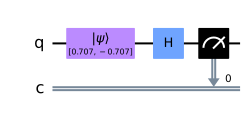

In [55]:
initial_state =[1/sqrt(2), -1/sqrt(2)]
qc = QuantumCircuit(1,1) ##notice the addition of cbit for the measurements
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0) #measure qubit 0 to classical bit 0
qc.draw()

Remember that $X=HZH$. What this is doing is: 

H-gate switches the qubit to X-basis, 

\begin{eqnarray}
H|0\rangle &= |+\rangle\\
H|1\rangle &= |-\rangle
\end{eqnarray}

Z-gate performs a NOT in the X-basis, 

\begin{eqnarray}
Z|+\rangle &= |-\rangle\\
Z|-\rangle &= |+\rangle
\end{eqnarray}

and the final H-gate returns the qubit to the Z-basis.

\begin{eqnarray}
H|+\rangle &= |0\rangle\\
H|-\rangle &= |1\rangle
\end{eqnarray}


__Quick exercises__:

#1 If we initialize our qubit in the state $|+\rangle$, what is the probability of measuring it in state $|-\rangle$ ?

#2 Use Qiskit to display the probability of measuring a $|0\rangle$  qubit in the states $|+\rangle$ and $|-\rangle$ (Hint: you might want to use .get_counts() and plot_histogram()).

#3 Try to create a function that measures in the Y-basis.

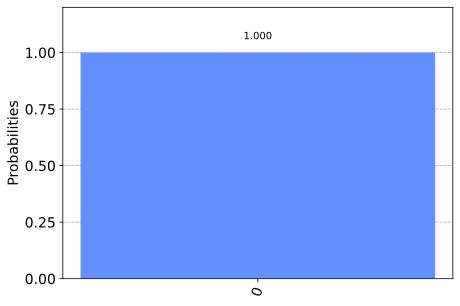

In [56]:
# Probability is zero
initial_state =[1/sqrt(2), 1/sqrt(2)]
qc = QuantumCircuit(1,1) ##notice the addition of cbit for the measurements
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0) #measure qubit 0 to classical bit 0
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)
#qc.draw()

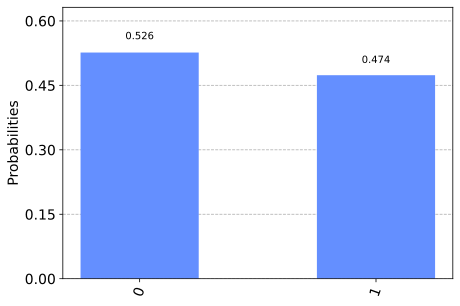

In [57]:
qc = QuantumCircuit(1,1)
x_measurement(qc, 0, 0)
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

## Probability is 1/2 and 1/2

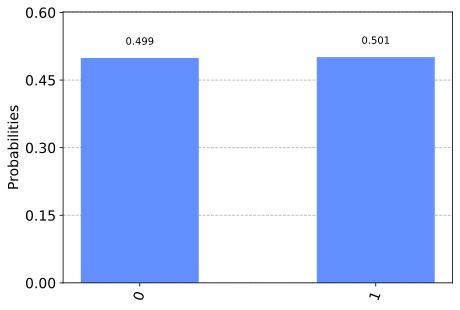

In [58]:
def y_measurement(qc,qubit,cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit,cbit)
    return qc

circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.barrier()


y_measurement(circuit, 0, 0)
counts = sim.run(qc).result().get_counts()
plot_histogram(counts)

__Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome.__

### The P-Gate

P-gate (phase gate) is parameterised by a rotation around the Z-axis.

$$
P(\phi) = 
\begin{bmatrix}
1 & 0\\
0 & e^{i\phi}
\end{bmatrix}
, \phi \  \mathrm{in} \ \mathbb{R}
$$


In [59]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

It is defined in Qiskit as 

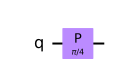

In [60]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

Notice the Z-gate is a special case of the P-gate, for $\phi=\pi$. There are also 3 other important special cases: the I, S, and T-Gates

### The I, S, and T-Gates

#### The I-Gate

Identity gate

$$
I = 
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
$$


The reaspm to consider this a gate (which does not do anything on a qubit) is its use in calculations, such as $I=XX$, etc.

__Quick exercise__:
Which are the eigenstates of the I-gate?

All statevectors should be eigenstates of the I-gate, with eigenvalue $=1$.

#### The S-Gate

$S$-gate, also known as $\sqrt{Z}$-gate $\rightarrow \phi=\pi/2$. Importantly, __it is not its own inverse__, i.e., $$SS \neq I$$.

$S^{\dagger}$-gate, also known as $\sqrt{Z}^{\dagger}$-gate $\rightarrow \phi=-\pi/2$

$$
SS|q\rangle = Z |q\rangle
$$
the reason for the $\sqrt{Z}$-gate.


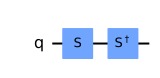

In [61]:
qc = QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw()

#### The T-Gate

$T$-gate, sometimes known as $\sqrt[4]{Z}$-gate, $\rightarrow \phi=\pi/4$

$$
T = 
\begin{bmatrix}
1 & 0\\
0 & \exp(i\pi/4)
\end{bmatrix},
\ \ \ 
T\dagger = 
\begin{bmatrix}
1 & 0\\
0 & \exp(-i\pi/4)
\end{bmatrix}
$$


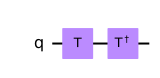

In [62]:
qc = QuantumCircuit(1)
qc.t(0)
qc.tdg(0)
qc.draw()

In [63]:
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

### The General U-Gate

$U$-gate, most general of the single qubit gates can be parameterised by 3-parameters:

$$
U(\theta, \phi, \lambda) =
\begin{bmatrix}
\cos(\theta/2) & e^{-i\lambda}\sin(\theta/2)\\
e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2)
\end{bmatrix}
$$

where the specific cases become 

$$
U(\frac{\pi}{2}, 0, \pi) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
= H,
\ \ \ \
U(0, 0, \lambda) = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\lambda}
\end{bmatrix}
= P
\ \ \ \
$$

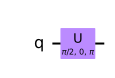

In [64]:
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)## 3 parameters and qubit to be applied to
qc.draw()

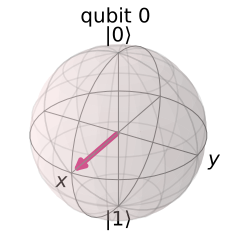

In [65]:
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

Qiskit also provides the X equivalent of S gates, SX-gate and SXdg-gate, which do a quarter turn around the X-axis.

__Before running on real IBM quantum hardware, all single qubit ops are compiled down to $I,X, SX$, and $R_z$, whihc are called _physical gates_.__

## The Case for Quantum

### Complexity of adding
 
 $$n \leq c(n) \leq 2n \longrightarrow c(n) = O(n)$$
 
 ### Big O notation
 
 For functions $f(x)$ and $g(x)$ and parameter $x$, the statement $f(x) = O(g(x))$ means that $\exists$ some finite $M>0$ and $x_0$ such that
 
 $$
 f(x) \leq Mg(x), \forall x > x_0
 $$

<img src="figures/1920px-Comparison_computational_complexity.png" style="width: 500px;">

Sclaing as functions of the input size $n$

### Complexity Theory

Multiplication: $O(n^2)$

Factorization: $O(e^{n^{1/3}})$

Searching database:$O(n)$

Formally, defining the complexity of an algorithm depends on the exact theoretical model for computation we are using. Each model has a set of basic operations, known as primitive operations, with which any algorithm can be expressed. 

For __Boolean circuits__, as we considered in the first section, the primitive operations are the logic gates. 

For __Turing machines__, a hypothetical form of computer proposed by Alan Turing, we imagine a device stepping through and manipulating information stored on a tape. 

The __RAM model__ has a more complex set of primitive operations and acts as an idealized form of the computers we use every day. 

All these are models of digital computation, based on discretized manipulations of discrete values. Different as they may seem from each other, _it turns out that it is very easy for each of them to simulate the others_.


### Beyond digital computers

__Digital computers__: discrete values (0-1, e.g.). Can detect and correct errors relatively easy.

__Analog computers__: precise manipulation of continuoulsy varying parameters. Issue: arbitrary precision.

Ideally: robusteness of digital with subtle manipulations of analog. 

Quantum computing is the only known technology exponentially fatster than classical computers for certain tasks.

### When to use QC

Novel algorithms: One way in which this can be done is when we have some function for which we want to determine a global property. For example, if we want to find the value of some parameter $x$ for which some function $f(x)$ is a minimum, or the period of the function if $f(x)$ is periodic.

Superposition of states to induce quantum interference and reveal global property.

Ex. 

__Grover's search algorithm__: $O(n)$ to $O(n^{1/2})$.

__Shor's factorization algorithm__: $O(e^{n^{1/3}})$ to $O(n^3)$ 

__Solve quantum problems__: dimensional need.

Particularly promising are those problems for which classical algorithms face inherent scaling limits and which do not require a large classical dataset to be loaded. 

See https://www.cs.virginia.edu/~robins/The_Limits_of_Quantum_Computers.pdf


In [66]:
import qiskit.tools.jupyter
%qiskit_version_table

/Users/ufranca/opt/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
